In [1]:
# modules

import glob
import os
from typing import List, Optional

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

In [3]:
class Folder:
    ROOT: str = '/home/hirano/work/Competition/Nishika_cable/'
    CSV: str = f'{ROOT}/input/csv'
    IMAGES: str = f'{ROOT}/input/train' 

# カレントディレクトリを変更する
os.chdir(Folder.ROOT)

In [5]:
csv_files = glob.glob(os.path.join(Folder.CSV, '*.csv'))
assert len(csv_files) != 0

In [6]:
jpg_files = sorted(glob.glob(os.path.join(Folder.IMAGES, '*.jpg')))
print(f'jpg ファイルは {len(jpg_files)} 個')
jpg_files[:10]  # ファイル数が半端ではないので表示するのはごく一部

jpg ファイルは 2371 個


['/home/hirano/work/Competition/Nishika_cable//input/train/000c15d0.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/0013fa17.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/00150bc1.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/00476816.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/004c5505.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/005fc418.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/007d45c8.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/00a4d448.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/00b8f2fd.jpg',
 '/home/hirano/work/Competition/Nishika_cable//input/train/00f3ca2e.jpg']

In [7]:
def get_size_channel(jpg_file: str) -> List[int]:
    '''画像の高さ、幅、チャネル数を取得する。

    Parameters
    ----------
    jpg_file: str
        画像のファイルパス。

    Returns
    -------
    size_channel_info: List[int], length = 3
        [高さ, 幅, チャネル数]
    '''
    img = plt.imread(jpg_file)
    return [
        img.shape[0],  # 高さ
        img.shape[1],  # 幅
        1 if img.ndim < 3 else img.shape[2]  # チャネル数
    ]

In [8]:
size_channel_info = []
for jpg_file in tqdm(jpg_files):
    img = plt.imread(jpg_file)
    # グレースケールではないこと
    assert(img.ndim == 3)
    size_channel_info.append([img.shape[0],  # 高さ
                              img.shape[1],  # 幅
                              img.shape[2]   # チャネル数
                              ])

100%|██████████| 2371/2371 [06:01<00:00,  6.56it/s]


In [9]:
df_size_channel = pd.DataFrame(data=size_channel_info,
                               columns=['height', 'width', 'num_channels'])
df_size_channel['filename'] = jpg_files
df_size_channel.describe()

,height,width,num_channels
count,2371.00,2371.00,2371.00
mean,2936.50,3801.90,3.00
std,621.78,782.04,0.00
min,321.00,347.00,3.00
25%,3024.00,4000.00,3.00
50%,3024.00,4032.00,3.00
75%,3024.00,4032.00,3.00
max,5632.00,5984.00,3.00


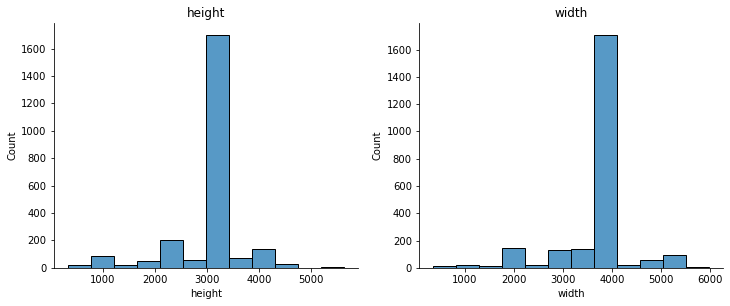

In [10]:
figure = plt.figure(figsize=(12, 4.5))
for i, column in enumerate(['height', 'width']):
    ax = plt.subplot(1, 2, i + 1)
    ax.set_title(column)
    sns.histplot(data=df_size_channel, x=column, bins=12)
    sns.despine()

In [11]:
train = pd.read_csv(os.path.join(Folder.CSV, 'train.csv'))
train_add = pd.read_csv(os.path.join(Folder.CSV, 'additional_data.csv'))

In [12]:
train.head()

,filename,Xmin_Ymin_Xmax_Ymax,class
0,2f71963a.jpg,"[921, 1510, 1558, 2207]",HDMI
1,8cdf4bda.jpg,"[1442, 1525, 1722, 2000]",USB_Mini
2,7ac35f30.jpg,"[666, 1671, 1990, 2259]",Dock
3,f6641c06.jpg,"[1242, 1753, 1789, 2115]",Lightning
4,4fdc8d7d.jpg,"[1572, 1050, 2231, 1691]",USB_Micro_B


In [13]:
train_add.head()

,filename,filename_trim,class
0,172e1676.jpg,172e1676_trim.jpg,USB_Micro_B_W
1,2ed927e9.jpg,2ed927e9_trim.jpg,USB_Mini
2,d62e1c29.jpg,d62e1c29_trim.jpg,HDMI
3,e0ccc43c.jpg,e0ccc43c_trim.jpg,VGA
4,d6a40317.jpg,d6a40317_trim.jpg,Lightning_T


In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   filename             2371 non-null   object
 1   Xmin_Ymin_Xmax_Ymax  2371 non-null   object
 2   class                2371 non-null   object
dtypes: object(3)
memory usage: 55.7+ KB
None


In [55]:
print(train_add.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filename       1648 non-null   object
 1   filename_trim  1648 non-null   object
 2   class          1648 non-null   object
dtypes: object(3)
memory usage: 38.8+ KB
None


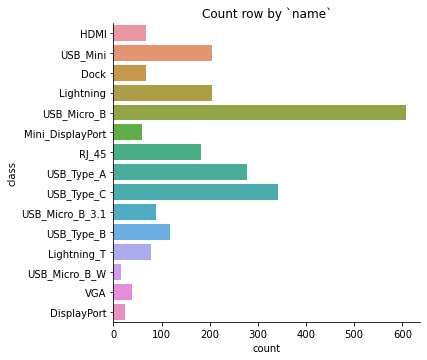

In [15]:
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=train, y='class')
ax.set_title('Count row by `name`')
sns.despine()

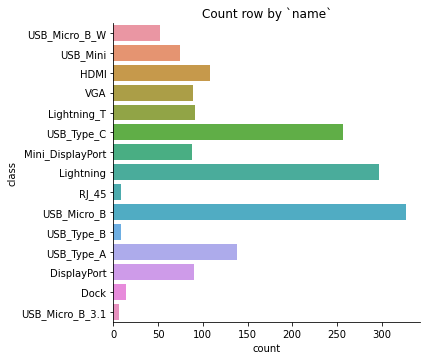

In [16]:
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=train_add, y='class')
ax.set_title('Count row by `name`')
sns.despine()

In [17]:
df_concat = pd.concat([train, train_add], axis=0)

In [18]:
df_concat

,filename,Xmin_Ymin_Xmax_Ymax,class,filename_trim
0,2f71963a.jpg,"[921, 1510, 1558, 2207]",HDMI,NaN
1,8cdf4bda.jpg,"[1442, 1525, 1722, 2000]",USB_Mini,NaN
2,7ac35f30.jpg,"[666, 1671, 1990, 2259]",Dock,NaN
3,f6641c06.jpg,"[1242, 1753, 1789, 2115]",Lightning,NaN
4,4fdc8d7d.jpg,"[1572, 1050, 2231, 1691]",USB_Micro_B,NaN
...,...,...,...,...
1643,1a42d526.jpg,NaN,Lightning,1a42d526_trim.jpg
1644,6b3c238e.jpg,NaN,USB_Type_C,6b3c238e_trim.jpg
1645,587a4905.jpg,NaN,USB_Mini,587a4905_trim.jpg
1646,ae600959.jpg,NaN,USB_Type_C,ae600959_trim.jpg


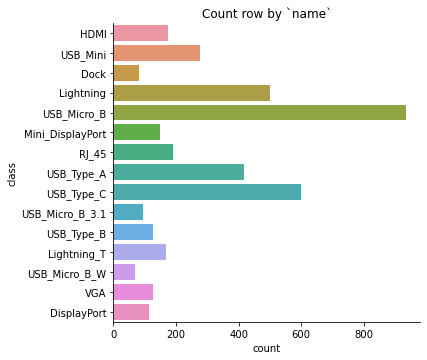

In [19]:
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=df_concat, y='class')
ax.set_title('Count row by `name`')
sns.despine()

In [20]:
df_concat['class'].unique()

array(['HDMI', 'USB_Mini', 'Dock', 'Lightning', 'USB_Micro_B',
       'Mini_DisplayPort', 'RJ_45', 'USB_Type_A', 'USB_Type_C',
       'USB_Micro_B_3.1', 'USB_Type_B', 'Lightning_T', 'USB_Micro_B_W',
       'VGA', 'DisplayPort'], dtype=object)